In [48]:
import spotipy
import dotenv
import os
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np

#import the login files from the .env file
dotenv.load_dotenv(override=True)

True

In [49]:
scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

# default song limit = 100
playlist = sp.playlist_tracks("4Zqxh2p4XIOZNTI1IiDJvz",
    fields="items(track(name, href, id, artists))")

offset = 0
# get a list of ids for every song
while len(playlist['items']) != 0:
    offset += len(playlist['items'])
    playlist = sp.playlist_tracks("4Zqxh2p4XIOZNTI1IiDJvz",
                                    fields="items(track(name, href, id, artists))",
                                    offset=offset)

print(offset)


# for idx, item in enumerate(playlist['items']):
#     track = item['track']
#     print(track['artists'][0]['name'], " – ", track['name'])


529


In [50]:
# stores playlist song names, track artist, and track ID into a list of dictionaries
def get_playlist_info(playlist_id):
    playlist_info = []
    offset = 0
    playlist = sp.playlist_tracks(playlist_id,
                                  fields="items(track(name, href, id, artists))",
                                  offset=offset)

    while len(playlist['items']) != 0:
        # iterate through playlist in segments of <= 100
        for idx, track in enumerate(playlist['items']):
            current = track['track']
            playlist_info.append({'Track_Name': current['name'],
                                  'Track_Artist': current['artists'][0]['name'],
                                  'Track_ID': current['id']})

        offset += len(playlist['items'])    # checks next set of songs
        playlist = sp.playlist_tracks(playlist_id,
                                    fields="items(track(name, href, id, artists))",
                                    offset=offset)

    return playlist_info

# print stored values
xD = get_playlist_info("4Zqxh2p4XIOZNTI1IiDJvz")
for idx, song in enumerate(xD):
    print(idx, "song: ", song['Track_Name'], " - ", song['Track_Artist'], "id: ", song['Track_ID'])


0 song:  Down on Love  -  Yellow Claw id:  682vrW6IbyVRpVZ1XWhrlp
1 song:  The Right Type  -  Dion Timmer id:  7a3YBK0s48V0N2LxpeNrQT
2 song:  You Remind Me (feat. Stanaj)  -  Gryffin id:  3Iqbhajo4nRQJU7ThH77Rt
3 song:  Remember (with ZOHARA)  -  Gryffin id:  3Ni1v6Xq3hIrnYqTlBlZyI
4 song:  Bye Bye (feat. Ivy Adara)  -  Gryffin id:  3SEupjP7CBdIoNPrFrMozG
5 song:  Nobody Compares To You (feat. Katie Pearlman)  -  Gryffin id:  2Un9MGFwpGdGU9yl9KOvXx
6 song:  Rockefeller Street (Rmx)  -  Getter Jaani id:  2BQgwqoVoXwyeNvyixTQwt
7 song:  Gold (Stupid Love)  -  Excision id:  1dlJQt9NLH5iFCIeiVz5lX
8 song:  Wake Up  -  Excision id:  1XP0VR8KMArstV37bfzkt8
9 song:  Better - noclue? Remix  -  Khalid id:  7MvSmQSG0iiZCQieeO9tNR
10 song:  Home  -  Excision id:  0AuFxpp4TJyybt9vv5fUnQ
11 song:  Can You Hear Me  -  Dion Timmer id:  67GcTqPFNOLwpRrv0ypJeF
12 song:  First Time (feat. Dylan Matthew)  -  Seven Lions id:  27YD36FUikKxbp3bKSiKGZ
13 song:  Superhuman (feat. Eric Leva)  -  SLANDER id:  

In [51]:

# Split the list into chunks of 100, as the API allows up to 100 IDs
chunks = [xD[x:x+100] for x in range(0, len(xD), 100)]
# xD[0]['Track_ID']
chunks[0]


audio_features_list = []
for musicChunk in chunks:
    audio_features = sp.audio_features(tracks=[song['Track_ID'] for song in musicChunk])
    
    for idx, song in enumerate(audio_features):
        audio_features_list.append({**song, 'track_name': musicChunk[idx]['Track_Name']})




# Get song features from Spotify, and insert them into a table

In [52]:
data = pd.DataFrame(audio_features_list, 
    columns=['id', 'track_name', 'danceability','energy','key','loudness','mode','speechiness',
             'acousticness','instrumentalness','liveness','valence','tempo', 'time_signature']
    )

data

,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,682vrW6IbyVRpVZ1XWhrlp,Down on Love,0.665,0.785,7,-4.832,1,0.0373,0.02760,0.000100,0.1380,0.479,124.990,4
1,7a3YBK0s48V0N2LxpeNrQT,The Right Type,0.681,0.690,0,-5.343,1,0.0395,0.23500,0.000000,0.0641,0.249,104.991,4
2,3Iqbhajo4nRQJU7ThH77Rt,You Remind Me (feat. Stanaj),0.573,0.881,3,-4.688,0,0.0331,0.11100,0.000000,0.2220,0.419,128.926,4
3,3Ni1v6Xq3hIrnYqTlBlZyI,Remember (with ZOHARA),0.619,0.901,11,-4.173,0,0.0563,0.09750,0.045500,0.1780,0.503,123.002,4
4,3SEupjP7CBdIoNPrFrMozG,Bye Bye (feat. Ivy Adara),0.618,0.754,4,-3.739,1,0.0882,0.00271,0.000000,0.2130,0.485,148.013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,7s9GCH2s1koH3AwgQHRwYh,Black Out,0.883,0.669,9,-9.958,0,0.1420,0.00508,0.460000,0.1010,0.800,123.988,4
525,5ANQcP9cHO6rC53lEWPnqq,Summer Jam - Remake,0.719,0.796,11,-7.063,0,0.1300,0.00572,0.000000,0.3120,0.509,125.980,4
526,3najjUUcIyF1tobYvdETMG,Until The End Of Summer,0.627,0.797,2,-5.301,0,0.0497,0.00467,0.000000,0.2780,0.509,126.020,4
527,7IWTIkiWGWNQyYfOLdMrGD,Burn Out (feat. Dewain Whitmore),0.594,0.722,4,-5.751,0,0.0398,0.01560,0.000000,0.0667,0.407,127.877,4


In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# convert dataframe to matrix without categorical columns
data_subset = data[['danceability','energy','loudness','speechiness',
             'acousticness','instrumentalness','liveness','valence','tempo']]
matrix = data_subset.to_numpy()

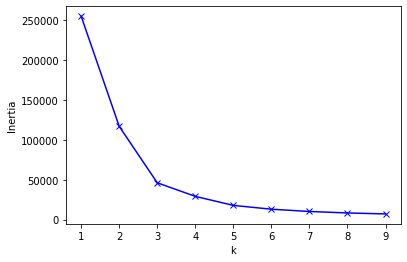

In [60]:
# source: https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters
# sum squared distance of data points from cluster centroids
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(matrix)
    kmeanModel.fit(matrix)
    inertia.append(kmeanModel.inertia_)
# plot the elbow to decide optimal number of clusters
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [64]:
# k was decided using the above graph
kmeans = KMeans(n_clusters=4).fit(matrix)

# stores track data index and cluster it belongs to
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = kmeans.labels_

cluster0 = cluster_map[cluster_map.cluster == 0]
# accesses track names (change to ID later) based on index of data stored in matrix
cluster0_names = data['track_name'][cluster0.index]
print(cluster0_names)

1                                     The Right Type
5      Nobody Compares To You (feat. Katie Pearlman)
10                                              Home
15                     Tie Me Down (with Elley Duhé)
16                                             YOUTH
                           ...                      
492                                         Diamonds
499     Avalanches (feat. Sound Remedy & Kill Paris)
509                                 Everything Black
516                                   Kill Me Better
518                               Happy Where We Are
Name: track_name, Length: 104, dtype: object


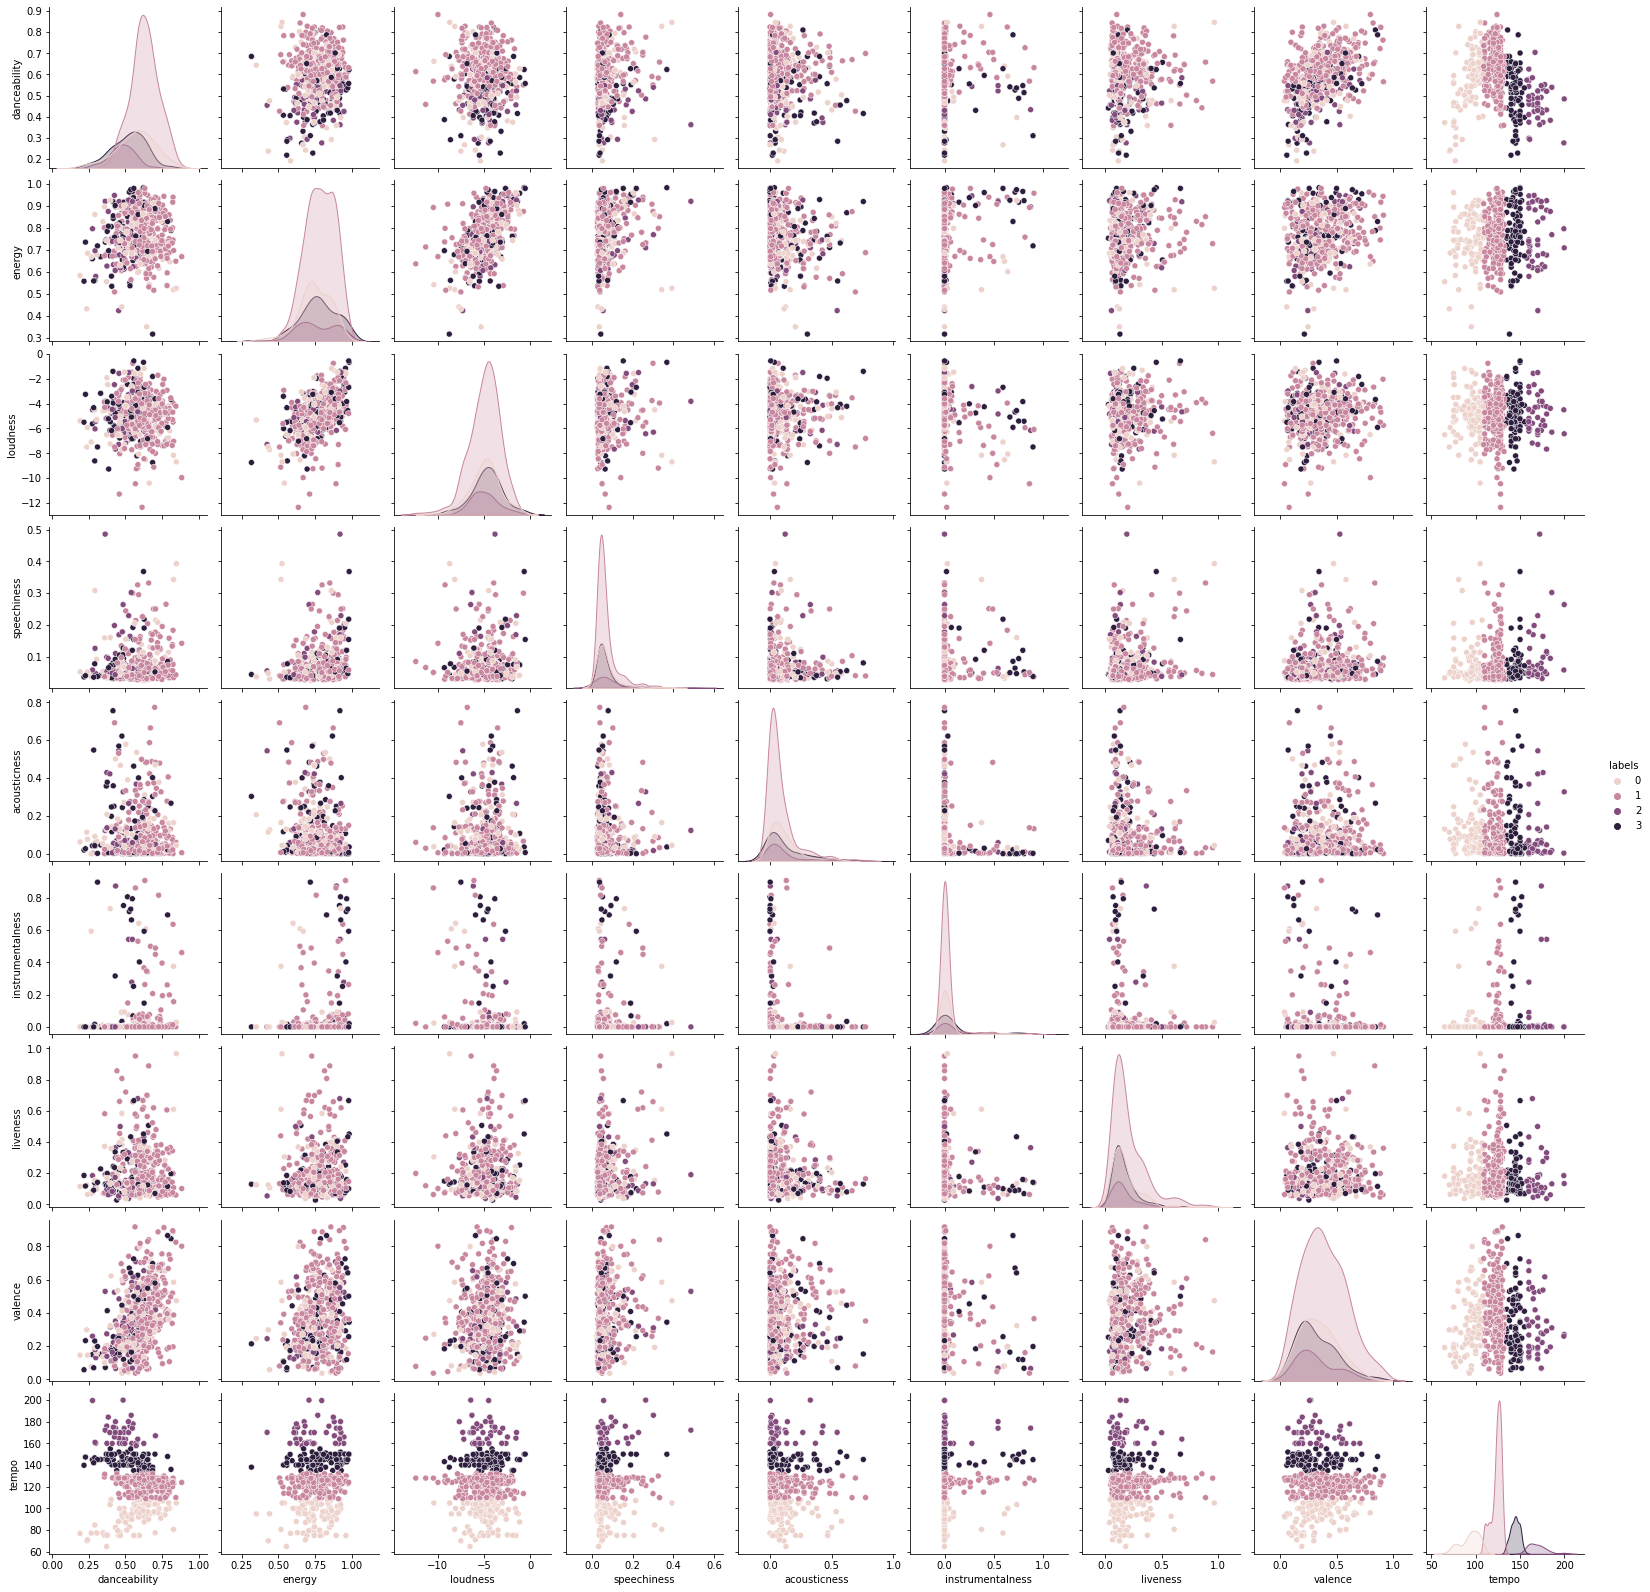

In [65]:
# source: https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters
# This is where the label output of the KMeans we just ran lives.
# Make it a dataframe so we can concatenate back to the original data.
labels = pd.DataFrame(kmeans.labels_)
labeledTracks = pd.concat((data_subset,labels),axis=1)
labeledTracks = labeledTracks.rename({0:'labels'},axis=1)

labeledTracks.head()

sns.pairplot(labeledTracks,hue='labels')